In [1]:
from piper import piper
from piper.defaults import *
from piper.verbs import *

piper version 0.0.9, last run: Tuesday, 09 March 2021 20:05:26


In [2]:
import seaborn as sns
df = sns.load_dataset('titanic')
head(df)

891 rows, 15 columns


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False


In [3]:
combine_header_rows(info(df).T)

Dataframe consumes 0.31 Mb


,survived int64,pclass int64,sex object,age float64,sibsp int64,parch int64,fare float64,embarked object,class category,who object,adult_male bool,deck category,embark_town object,alive object,alone bool
n,891,891,891,891,891,891,891,891,891,891,891,891,891,891,891
isna,0,0,0,177,0,0,0,2,0,0,0,688,2,0,0
isnull,0,0,0,177,0,0,0,2,0,0,0,688,2,0,0
unique,2,3,2,88,7,7,248,3,3,3,2,7,3,2,2


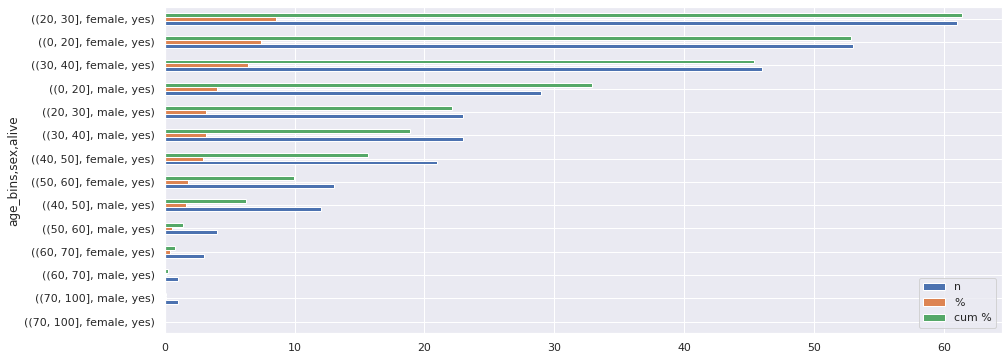

In [4]:
df['age_bins'] = pd.cut(df.age, bins=[0, 20, 30, 40, 50, 60, 70, 100])

fig, ax = plt.subplots(figsize=(15, 6))
(count(df, ['age_bins', 'sex', 'alive'], sort_values=True, percent=True, round=5)
 .query("alive == 'yes'")
 .plot(ax=ax, kind='barh')
);

In [5]:
adorn(count(df, 'age', percent=True, round=5), ignore_row_index=True)

,n,%,cum %
0,30,4.20168,4.20168
1,27,3.78151,7.98319
2,26,3.64146,11.62465
3,25,3.50140,15.12605
4,25,3.50140,18.62745
...,...,...,...
84,1,0.14006,99.57983
85,1,0.14006,99.71989
86,1,0.14006,99.85994
87,1,0.14006,100.00000


In [6]:
adorn(count(df, 'pclass', percent=True, round=5), ignore_row_index=True)

,n,%,cum %
0,491,55.10662,55.10662
1,216,24.24242,79.34905
2,184,20.65095,100.00000
3,All,99.99999,234.45567


In [7]:
adorn(count(df, 'class', percent=True, round=5), ignore_row_index=True)

,n,%,cum %
0,491,55.10662,55.10662
1,216,24.24242,79.34905
2,184,20.65095,100.00000
3,All,99.99999,234.45567


In [8]:
adorn(count(df, 'who', percent=True, round=5), ignore_row_index=True)

,n,%,cum %
0,537,60.26936,60.26936
1,271,30.41526,90.68462
2,83,9.31538,100.00000
3,All,100.00000,250.95398


In [9]:
adorn(count(df, 'sex', percent=True, round=5), ignore_row_index=True)

,n,%,cum %
0,577,64.7587,64.7587
1,314,35.2413,100.0000
2,All,100.0000,164.7587
